# EM Algorithm For Estimating Haplotype Frequencies

The package containing the EM algorithm is called haplofreq. The algorithm is located in EM.py. The package also includes 7 example .ped datasets. The function of the package: haplofreq(), takes .ped datasets (in a Pandas dataframe) as input, and outputs all the possible haplotype combinations as well as their estimated frequencies. In this tutotrial, haplotype frequencies will be estimated for three different datasets containing 2, 3 and 4 SNPs respectively. All .ped datasets contain 6 individuals. The first 6 columns of the .ped datasets are irrelevant, as they are omitted from the algorithm. Additionally, a plot is produced to show the efficiency of the algorithm.

Note: only bi-allelic snps can be contained in the .ped datasets. Furthermore, there can be no missing data.

Importing Packages

haplofreq is the package, and EM.py is the code for estimating haplotype frequencies. Pandas is required to read in the .ped datasets. time, numpy and matplotlib.pyplot are not required, but are used to illustrate the algorithm efficiency.

In [1]:
from haplofreq.EM import haplofreq
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

Using the help function on the haplofreq function.

In [2]:
help(haplofreq)

Help on function haplofreq in module haplofreq.EM:

haplofreq(peddf)
    haplofreq: Software for Determining all Possible Haplotypes and their Estimated Frequencies. 
    
    Description 
    
    haplofreq() is a function that outputs all possible haplotypes as well as their respective frequencies
    for a given inputted genotype dataset. This is accomplished using an EM algorithm developed by Excoffier and 
    Slatkin (1995). 
    
    Usage 
    
    haplofreq(peddf) 
    
    Arguments 
    
    peddf       A .ped file that is read as a Pandas dataframe. The data must not contain any missing genotype data and 
                must only contain bi-allelic SNPs. 
    
    Details 
    
    The algorithm was developed by Excoffier and Slatkin (1995), and takes advantage of the Expectation-Maximization
    algorithm. The expectation step produces a vector of genotype probabilities for all possible genotypes and the
    maximization step consists of estimating the haplotype frequenci

Estimating haplotype frequencies of a .ped file containing 2 SNPs.

In [3]:
data = pd.read_csv("haplofreq\\2snps.ped", delim_whitespace=True, header = None)
haplofreq(data)

,Haplotypes,Frequency
0,"[G, C]",0.5
1,"[G, T]",0.166667
2,"[T, C]",1.38533e-07
3,"[T, T]",0.333333


Estimating haplotype frequencies of a .ped file containing 3 SNPs.

In [4]:
data = pd.read_csv("haplofreq\\3snps.ped", delim_whitespace=True, header = None)
haplofreq(data)

,Haplotypes,Frequency
0,"[G, C, A]",0.5
1,"[G, C, T]",4.11295e-08
2,"[G, T, A]",0.0833334
3,"[G, T, T]",0.0833334
4,"[T, C, A]",4.11295e-08
5,"[T, C, T]",4.11295e-08
6,"[T, T, A]",0.0833334
7,"[T, T, T]",0.25


Estimating haplotype frequencies of a .ped file containing 4 SNPs.

In [5]:
data = pd.read_csv("haplofreq\\4snps.ped", delim_whitespace=True, header = None)
haplofreq(data)

,Haplotypes,Frequency
0,"[G, C, A, G]",1.88298e-07
1,"[G, C, A, T]",0.5
2,"[G, C, T, G]",3.65688e-14
3,"[G, C, T, T]",7.01702e-12
4,"[G, T, A, G]",0.0416667
5,"[G, T, A, T]",0.0416667
6,"[G, T, T, G]",1.5379e-79
7,"[G, T, T, T]",0.0833333
8,"[T, C, A, G]",1.14334e-10
9,"[T, C, A, T]",1.85707e-14


A plot illustrating the time it takes for importing data and running haplofreq() for various datasets with differing number of SNPs.

Text(0, 0.5, 'Time (Seconds)')

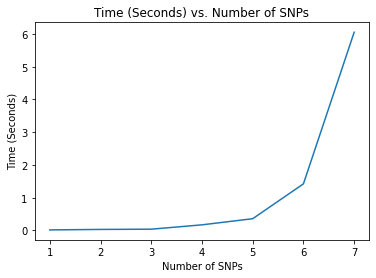

In [6]:
timer = np.zeros(7)

for i in range(len(timer)):
    start_time = time.time()
    data = pd.read_csv("haplofreq\\" + str(i+1) + "snps.ped", delim_whitespace=True, header = None)
    haplofreq(data)
    timer[i] = time.time() - start_time

plt.plot(np.array([1,2,3,4,5,6,7]), timer)
plt.title("Time (Seconds) vs. Number of SNPs")
plt.xlabel("Number of SNPs")
plt.ylabel("Time (Seconds)")